# Load correction and counting ( lcc )

Load correction and counting module provides several load correction and cycle counting methods.

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

## ASTM counting methods

### ASTM level crossing counting

Function `astmLevelCrossingCounting` implements the level crossing counting method in ASTM E1049-85 (2017): sec 5.1.1.

By the definition:

> One count is recorded each time the positive sloped portion of the load exceeds a preset level above the reference load, and each time the negative sloped portion of the load exceeds a preset level below the reference load. Reference load crossings are counted on the positive sloped portion of the loading history.

#### Function help

In [2]:
from ffpack.lcc import astmLevelCrossingCounting
help( astmLevelCrossingCounting )

Help on function astmLevelCrossingCounting in module ffpack.lcc.astmCounting:

astmLevelCrossingCounting(data, refLevel=0.0, levels=None, aggregate=True)
    ASTM level crossing counting in E1049-85: sec 5.1.1.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    refLevel: scalar, optional
        Reference level.
    levels: 1d array
        Self-defined levels for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ crossPoint1, corssPoint2, ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import astmLevelCrossingCounting
    >>> data = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3, 
    >>>          -2.2, -2.6, -2.4, -3.3, 1.5

#### Example with default values

In [3]:
astmLccSequenceData = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3, 
                        -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]

astmLccCountingResults = astmLevelCrossingCounting( astmLccSequenceData )

In [4]:
print( astmLccCountingResults )

[[-3.0, 1.0], [-2.0, 1.0], [-1.0, 2.0], [0.0, 2.0], [1.0, 5.0], [2.0, 3.0], [3.0, 2.0]]


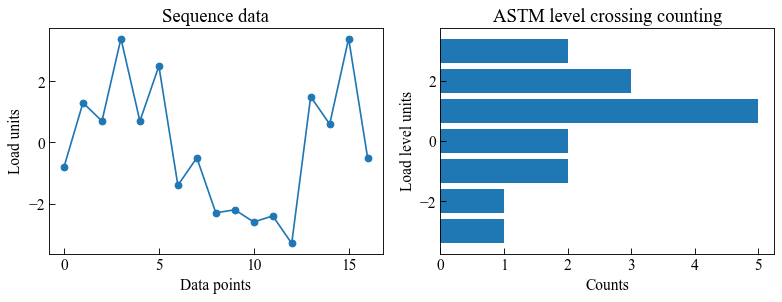

In [5]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmLccSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmLccCountingResults )[ :, 0 ], 
          np.array( astmLccCountingResults )[ :, 1 ] )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load level units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM level crossing counting" )

plt.tight_layout()
plt.show()

### ASTM peak counting

Function `astmPeakCounting` implements the peak counting method in ASTM E1049-85 (2017): sec 5.2.1.

By the definition:

> Peaks above the reference load level are counted, and valleys below the reference load level are counted.

#### Function help

In [6]:
from ffpack.lcc import astmPeakCounting
help( astmPeakCounting )

Help on function astmPeakCounting in module ffpack.lcc.astmCounting:

astmPeakCounting(data, refLevel=None, aggregate=True)
    ASTM peak counting in E1049-85: sec 5.2.1.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    refLevel: scalar, optional
        Reference level.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ peak1, peak2, ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import astmPeakCounting
    >>> data = [ 0.0, 1.5, 0.5, 3.5, 0.5, 2.5, -1.5, -0.5, -2.5, 
    >>>          -2.0, -2.7, -2.5, -3.5, 1.5, 0.5, 3.5, -0.5 ]
    >>> rst = astmPeakCounting( data )



#### Example with default values

In [7]:
astmPcSequenceData = [ 0.0, 1.5, 0.5, 3.5, 0.5, 2.5, -1.5, -0.5, -2.5, 
                       -2.0, -2.7, -2.5, -3.5, 1.5, 0.5, 3.5, -0.5 ]

astmPcCountingResults = astmPeakCounting( astmPcSequenceData )

In [8]:
print( astmPcCountingResults )

[[-3.5, 1.0], [-2.7, 1.0], [-2.5, 1.0], [-1.5, 1.0], [1.5, 2.0], [2.5, 1.0], [3.5, 2.0]]


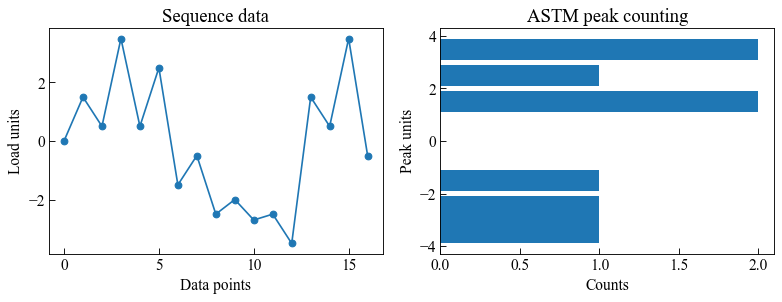

In [9]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmPcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmPcCountingResults )[ :, 0 ], 
          np.array( astmPcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Peak units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM peak counting" )

plt.tight_layout()
plt.show()

### ASTM simple range counting

Function `astmSimpleRangeCounting` implements the simple range counting method in ASTM E1049-85 (2017): sec 5.3.1.

By the definition:

> A range is defined as the difference between two successive reversals, the range being positive when a valley is followed by a peak and negative when a peak is followed by a valley. If only positive or only negative ranges are counted, then each is counted as one cycle. If both positive and negative ranges are counted, then each is counted as one-half cycle.

#### Function help

In [10]:
from ffpack.lcc import astmSimpleRangeCounting
help( astmSimpleRangeCounting )

Help on function astmSimpleRangeCounting in module ffpack.lcc.astmCounting:

astmSimpleRangeCounting(data, aggregate=True)
    ASTM simple range counting in E1049-85: sec 5.3.1.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import astmSimpleRangeCounting
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst = astmSimpleRangeCounting( data )



#### Example with default values

In [11]:
astmSrcSequenceData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]

astmSrcCountingResults = astmSimpleRangeCounting( astmSrcSequenceData )

In [12]:
print( astmSrcCountingResults )

[[3.0, 0.5], [4.0, 1.0], [6.0, 1.0], [7.0, 0.5], [8.0, 1.0]]


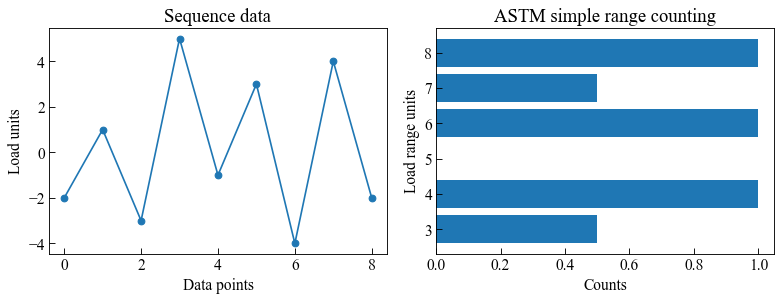

In [13]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmSrcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmSrcCountingResults )[ :, 0 ],
          np.array( astmSrcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM simple range counting" )

plt.tight_layout()
plt.show()

### ASTM range pair counting

Function `astmRangePairCounting` implements the range pair counting method in ASTM E1049-85 (2017): sec 5.4.3.

By the definition:

> The range-paired method counts a range as a cycle if it can be paired with a subsequent loading in the opposite direction.

#### Function help

In [14]:
from ffpack.lcc import astmRangePairCounting
help( astmRangePairCounting )

Help on function astmRangePairCounting in module ffpack.lcc.astmCounting:

astmRangePairCounting(data, aggregate=True)
    ASTM range pair counting in E1049-85: sec 5.4.3.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import astmRangePairCounting
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst = astmRangePairCounting( data )



#### Example with default values

In [15]:
astmRpcSequenceData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]

astmRpcCountingResults = astmRangePairCounting( astmRpcSequenceData )

In [16]:
print( astmRpcCountingResults )

[[3.0, 1.0], [4.0, 1.0], [6.0, 1.0], [8.0, 1.0]]


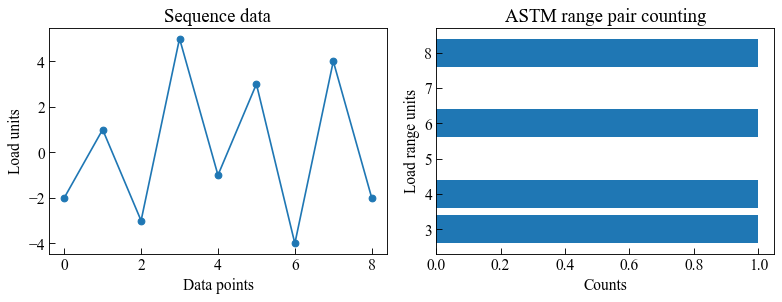

In [17]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmRpcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmRpcCountingResults )[ :, 0 ], 
          np.array( astmRpcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM range pair counting" )

plt.tight_layout()
plt.show()

### ASTM rainflow counting

Function `astmRainflowCounting` implements the rainflow counting method in ASTM E1049-85 (2017): sec 5.4.4.

**Notes**

The original rainflow counting method in ASTM does not provide any preprocessing method for the sequence data or postprocessing method for counting results. To get meaningful results, we provide the preprocessing `sequenceDigitization` function to digitize the input sequence data with a specific resolution, such as 0.5, or the postprocessing `cycleCountingAggregation` function to aggregate the cycle counting results. See the following examples for details.

#### Function help

In [18]:
from ffpack.lcc import astmRainflowCounting
help( astmRainflowCounting )

Help on function astmRainflowCounting in module ffpack.lcc.astmCounting:

astmRainflowCounting(data, aggregate=True)
    ASTM rainflow counting in E1049-85: sec 5.4.4.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting, 
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import astmRainflowCounting
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst = astmRainflowCounting( data )



#### Example with default values

In [19]:
astmRfcSequenceData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]

astmRfcCountingResults = astmRainflowCounting( astmRfcSequenceData )

In [20]:
print( astmRfcCountingResults )

[[3.0, 0.5], [4.0, 1.5], [6.0, 0.5], [8.0, 1.0], [9.0, 0.5]]


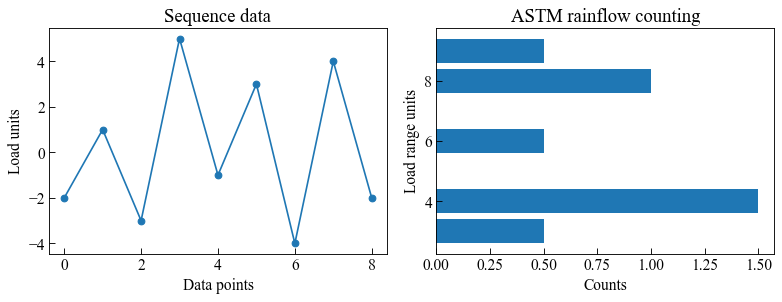

In [21]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmRfcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmRfcCountingResults )[ :, 0 ], 
          np.array( astmRfcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM rainflow counting" )

plt.tight_layout()
plt.show()

#### Example with sequence digitization

This example demonstrates the usage of `sequenceDigitization` function **before** the rainflow counting method. The rainflow counting method counts the number of the different load ranges. Therefore, undigitized sequence data can generate noisy output results. With the `sequenceDigitization` function, the output results can be aggregated.

In [22]:
from ffpack.utils import sequenceDigitization

In [23]:
astmRfcSequenceData = [ -2.4, 1.3, -3.3, 4.6, -1.4, 3.2, -4.4, 4.2, -2.1 ]
digitizedAstmRfcSequenceData = sequenceDigitization( astmRfcSequenceData, 
                                                     resolution=1.0 )

originalAstmRfcCountingResults = astmRainflowCounting( astmRfcSequenceData )
digitizedAstmRfcCountingResults = astmRainflowCounting( digitizedAstmRfcSequenceData )

In [24]:
print( "Original sequence data: " )
print( astmRfcSequenceData )
print()
print( "Digitized sequence data with resolution of 1.0: " )
print( digitizedAstmRfcSequenceData )
print()

with np.printoptions( precision=3, suppress=True ):
    print( "Original rainflow counting results: " )
    print( np.array( originalAstmRfcCountingResults ) )
    print()
    print( "Digitized rainflow counting results: " )
    print( np.array( digitizedAstmRfcCountingResults ) )

Original sequence data: 
[-2.4, 1.3, -3.3, 4.6, -1.4, 3.2, -4.4, 4.2, -2.1]

Digitized sequence data with resolution of 1.0: 
[-2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0]

Original rainflow counting results: 
[[3.7 0.5]
 [4.6 1.5]
 [6.3 0.5]
 [7.9 0.5]
 [8.6 0.5]
 [9.  0.5]]

Digitized rainflow counting results: 
[[3.  0.5]
 [4.  1.5]
 [6.  0.5]
 [8.  1. ]
 [9.  0.5]]


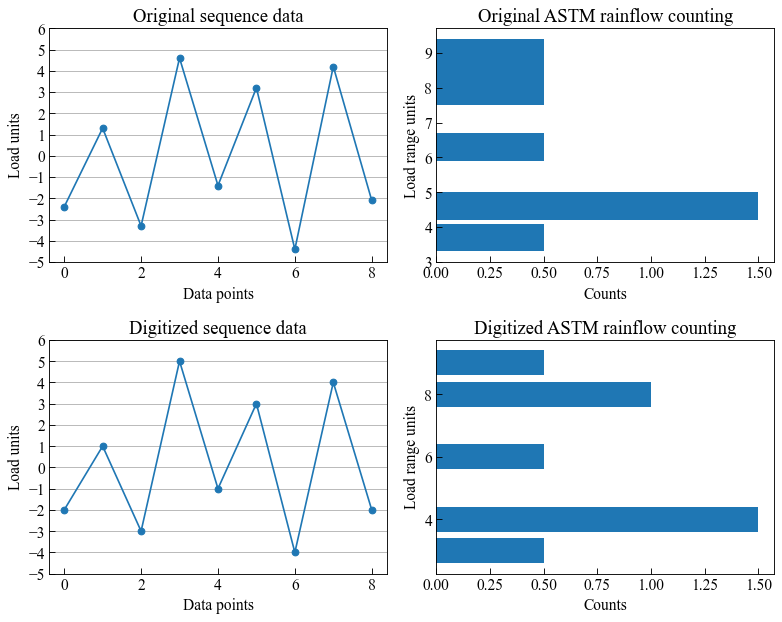

In [25]:
fig, ( ax1, ax2 ) = plt.subplots( 2, 2, figsize=( 10, 8 ) )

ax1[0].plot( astmRfcSequenceData, "o-" )

ax1[0].tick_params( axis='x', direction="in", length=5 )
ax1[0].tick_params( axis='y', direction="in", length=5 )
ax1[0].set_ylabel( "Load units" )
ax1[0].set_xlabel( "Data points" )
ax1[0].set_title( "Original sequence data" )
ax1[0].set_yticks( np.arange(-5, 6.5, 1) )
ax1[0].grid( axis='y', color="0.7" )

ax1[1].barh( np.array( originalAstmRfcCountingResults )[ :, 0 ], 
             np.array( originalAstmRfcCountingResults )[ :, 1 ] )

ax1[1].tick_params( axis='x', direction="in", length=5 )
ax1[1].tick_params( axis='y', direction="in", length=5 )
ax1[1].set_ylabel( "Load range units" )
ax1[1].set_xlabel( "Counts" )
ax1[1].set_title( "Original ASTM rainflow counting" )

ax2[0].plot( digitizedAstmRfcSequenceData, "o-" )

ax2[0].tick_params( axis='x', direction="in", length=5 )
ax2[0].tick_params( axis='y', direction="in", length=5 )
ax2[0].set_ylabel( "Load units" )
ax2[0].set_xlabel( "Data points" )
ax2[0].set_title( "Digitized sequence data" )
ax2[0].set_yticks( np.arange(-5, 6.5, 1) )
ax2[0].grid( axis='y', color="0.7" )

ax2[1].barh( np.array( digitizedAstmRfcCountingResults )[ :, 0 ], 
             np.array( digitizedAstmRfcCountingResults )[ :, 1 ] )

ax2[1].tick_params( axis='x', direction="in", length=5 )
ax2[1].tick_params( axis='y', direction="in", length=5 )
ax2[1].set_ylabel( "Load range units" )
ax2[1].set_xlabel( "Counts" )
ax2[1].set_title( "Digitized ASTM rainflow counting" )

plt.tight_layout()
plt.show()

#### Example with cycle counting aggregation

This example demonstrates the usage of `cycleCountingAggregation` function **after** the rainflow counting method. The rainflow counting method counts the number of the different load ranges. Therefore, undigitized sequence data can generate noisy output results. With the `cycleCountingAggregation` function, the output results can be aggregated.

It should be noted that there exists **discrepancy** of the final counting results with the preprocessing `sequenceDigitization` method and the postprocessing `cycleCountingAggregation` method. 

In [26]:
from ffpack.utils import cycleCountingAggregation

In [27]:
astmRfcSequenceData = [ -2.4, 1.3, -3.3, 4.6, -1.4, 3.2, -4.4, 4.2, -2.1 ]

originalAstmRfcCountingResults = astmRainflowCounting( astmRfcSequenceData )
aggregatedAstmRfcCountingResults = cycleCountingAggregation( 
    originalAstmRfcCountingResults )

In [28]:
print( "Original sequence data: " )
print( astmRfcSequenceData )
print()

with np.printoptions( precision=3, suppress=True ):
    print( "Original rainflow counting results: " )
    print( np.array( originalAstmRfcCountingResults ) )
    print()
    print( "Digitized rainflow counting results: " )
    print( np.array( aggregatedAstmRfcCountingResults ) )

Original sequence data: 
[-2.4, 1.3, -3.3, 4.6, -1.4, 3.2, -4.4, 4.2, -2.1]

Original rainflow counting results: 
[[3.7 0.5]
 [4.6 1.5]
 [6.3 0.5]
 [7.9 0.5]
 [8.6 0.5]
 [9.  0.5]]

Digitized rainflow counting results: 
[[4.  0.5]
 [5.  1.5]
 [6.  0.5]
 [8.  0.5]
 [9.  1. ]]


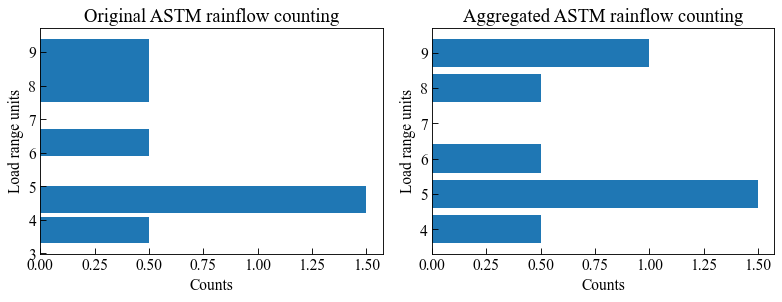

In [29]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.barh( np.array( originalAstmRfcCountingResults )[ :, 0 ], 
          np.array( originalAstmRfcCountingResults )[ :, 1 ] )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load range units" )
ax1.set_xlabel( "Counts" )
ax1.set_title( "Original ASTM rainflow counting" )

ax2.barh( np.array( aggregatedAstmRfcCountingResults )[ :, 0 ], 
          np.array( aggregatedAstmRfcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "Aggregated ASTM rainflow counting" )

plt.tight_layout()
plt.show()

### ASTM rainflow counting for repeating histories

Function `astmRainflowRepeatHistoryCounting` implements the rainflow counting for repeating histories method in ASTM E1049-85 (2017): sec 5.4.5.

**Notes**

The original rainflow counting for repeating histories method in ASTM does not provide any preprocessing method for the sequence data or postprocessing method for counting results. To get meaningful results, we provide the preprocessing `sequenceDigitization` function to digitize the input sequence data with a specific resolution, such as 0.5, or the postprocessing `cycleCountingAggregation` function to aggregate the cycle counting results. See the previous "ASTM rainflow counting" section for details.

#### Function help 

In [30]:
from ffpack.lcc import astmRainflowRepeatHistoryCounting
help( astmRainflowRepeatHistoryCounting )

Help on function astmRainflowRepeatHistoryCounting in module ffpack.lcc.astmCounting:

astmRainflowRepeatHistoryCounting(data, aggregate=True)
    ASTM simplified rainflow counting for repeating histories in E1049-85: sec 5.4.5.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 2 or the data dimension is not 1.
        If the data is not repeatable: first data point is different from the 
        last data point. 
    
    Examples
    --------
    >>> from ffpack.lcc import astmRainflowRepeatHistoryCounting
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0,

#### Example with default values

In [31]:
astmRfcrhSequenceData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]

astmmRfcrhCountingResults = astmRainflowRepeatHistoryCounting( astmRfcrhSequenceData )

In [32]:
print( astmmRfcrhCountingResults )

[[3.0, 1.0], [4.0, 1.0], [7.0, 1.0], [9.0, 1.0]]


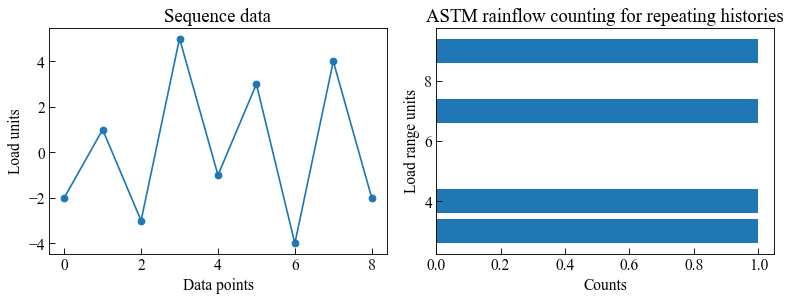

In [33]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( astmRfcrhSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( astmmRfcrhCountingResults )[ :, 0 ], 
          np.array( astmmRfcrhCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "ASTM rainflow counting for repeating histories" )

plt.tight_layout()
plt.show()

## Johannesson counting method

### Johannesson min max counting

Function `johannessonMinMaxCounting` implements the Johannesson min max counting method ( Definition 2 in the reference ).

Reference: 

* Johannesson, P., 1998. Rainflow cycles for switching processes with Markov structure. Probability in the Engineering and Informational Sciences, 12(2), pp.143-175.

#### Function help

In [34]:
from ffpack.lcc import johannessonMinMaxCounting
help( johannessonMinMaxCounting )

Help on function johannessonMinMaxCounting in module ffpack.lcc.johannessonCounting:

johannessonMinMaxCounting(data, aggregate=True)
    Johannesson min-max counting 
    
    Parameters
    ----------
    data: 1d array 
        Load sequence data for counting.
    aggragate: bool, optional
        if aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], [ rangeStart2, rangeEnd2, count2 ], ... ], 
        will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1
        If the data length is less than 2
    
    Examples
    --------
    >>> from ffpack.lcc import johannessonMinMaxCounting
    >>> data = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3, 
    >>>          -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]
    >>> rst = johannessonMinMaxCounting( data )



#### Example with default values

In [35]:
johannessonMmcSequenceData = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3,
                               -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]

johannessonMmcCountingResults = johannessonMinMaxCounting( johannessonMmcSequenceData )

In [36]:
print( johannessonMmcCountingResults )

[[0.1, 1.0], [0.2, 1.0], [0.9, 1.0], [1.8, 1.0], [2.1, 1.0], [4.2, 1.0], [4.8, 1.0], [6.7, 1.0]]


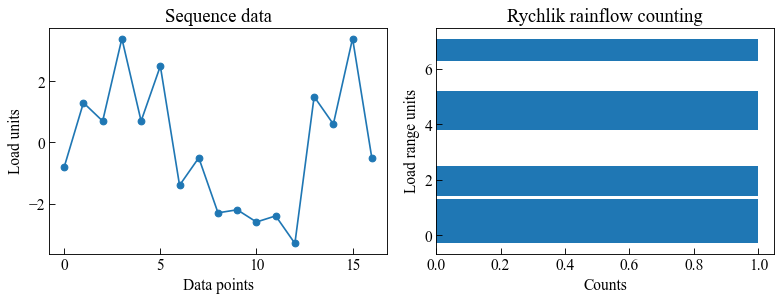

In [37]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( johannessonMmcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( johannessonMmcCountingResults )[ :, 0 ], 
          np.array( johannessonMmcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "Rychlik rainflow counting" )

plt.tight_layout()
plt.show()

## Rychlik counting method

### Rychlik rainflow counting

Function `rychlikRainflowCounting` implements the Rychlik rainflow counting method.

Reference: 

* Rychlik, I., 1987. A new definition of the rainflow cycle counting method. International journal of fatigue, 9(2), pp.119-121.

#### Function help

In [38]:
from ffpack.lcc import rychlikRainflowCounting
help( rychlikRainflowCounting )

Help on function rychlikRainflowCounting in module ffpack.lcc.rychlikCounting:

rychlikRainflowCounting(data, aggregate=True)
    Rychilk rainflow counting (toplevel-up cycle TUC)
    
    Parameters
    ----------
    data: 1d array 
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], [ rangeStart2, rangeEnd2, count2 ], ... ], 
        will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1
        If the data length is less than 2
    
    Examples
    --------
    >>> from ffpack.lcc import rychlikRainflowCycleCounting
    >>> data = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3, 
    >>>          -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]
    >>> rst = rychlikRainflowCycleCounting( data )



#### Example with default values

In [39]:
rychlikRfcSequenceData = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3,
                   -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]

rychlikRfcCountingResults = rychlikRainflowCounting( rychlikRfcSequenceData )

In [40]:
print( rychlikRfcCountingResults )

[[0.1, 1.0], [0.2, 1.0], [0.6, 1.0], [0.9, 2.0], [1.8, 1.0], [3.9, 1.0], [4.2, 1.0]]


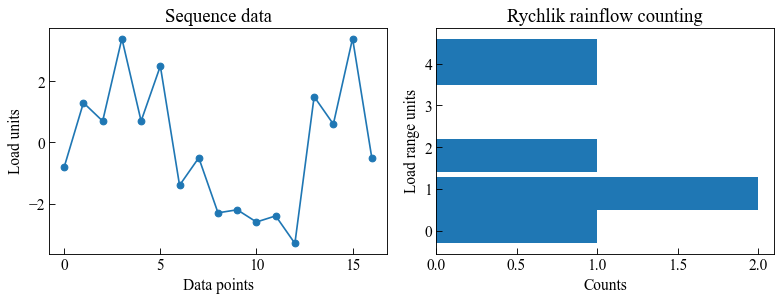

In [41]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( rychlikRfcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( rychlikRfcCountingResults )[ :, 0 ], 
          np.array( rychlikRfcCountingResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "Rychlik rainflow counting" )

plt.tight_layout()
plt.show()

## Four pointing counting method

### Four pointing counting method

Function `fourPointRainflowCounting` implements the four pointing counting method in the book by Lee et al.

Reference: 

* Lee, Y.L., Barkey, M.E. and Kang, H.T., 2011. Metal fatigue analysis handbook: practical problem-solving techniques for computer-aided engineering. Elsevier.

#### Function help

In [42]:
from ffpack.lcc import fourPointRainflowCounting
help( fourPointRainflowCounting )

Help on function fourPointRainflowCounting in module ffpack.lcc.fourPointCounting:

fourPointRainflowCounting(data, aggregate=True)
    Four point rainflow counting in [Lee2011]_.
    
    Parameters
    ----------
    data: 1d array
        Load sequence data for counting.
    aggragate: bool, optional
        If aggregate is set to False, the original sequence for internal counting,
        e.g., [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ], will be returned.
    
    Returns
    -------
    rst: 2d array
        Sorted counting results.
    
    Raises
    ------
    ValueError
        If the data length is less than 4 or the data dimension is not 1.
    
    Examples
    --------
    >>> from ffpack.lcc import fourPointRainflowCounting
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst = fourPointRainflowCounting( data )
    
    References
    ----------
    .. [Lee2011] Lee, Y.L., Barkey, M.E. and Kang, H.T.

#### Example with default values

In [43]:
fpcSequenceData = [ -0.8, 1.3, 0.7, 3.4, 0.7, 2.5, -1.4, -0.5, -2.3,
                   -2.2, -2.6, -2.4, -3.3, 1.5, 0.6, 3.4, -0.5 ]

fpcResults = fourPointRainflowCounting( fpcSequenceData )

In [44]:
print( fpcResults )

[[0.1, 1.0], [0.2, 1.0], [0.6, 1.0], [0.9, 2.0], [1.8, 1.0]]


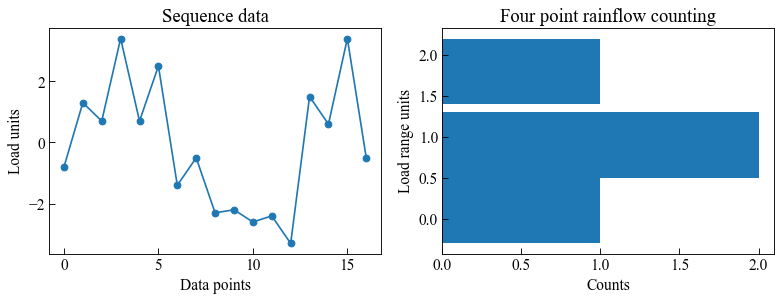

In [45]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( fpcSequenceData, "o-" )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.barh( np.array( fpcResults )[ :, 0 ], 
          np.array( fpcResults )[ :, 1 ] )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax2.set_ylabel( "Load range units" )
ax2.set_xlabel( "Counts" )
ax2.set_title( "Four point rainflow counting" )

plt.tight_layout()
plt.show()